# using simple FNN model & CNN model to classify cifar10 dataset

In [23]:
# load package
import tensorflow.compat.v1 as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
import numpy as np
%matplotlib inline
tf.disable_v2_behavior()

In [2]:
# 加载十类图像训练集 Load a training set of cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train,y_train

170498071/170498071 [==============================] - 40s 0us/step


(array([[[[ 59,  62,  63],
          [ 43,  46,  45],
          [ 50,  48,  43],
          ...,
          [158, 132, 108],
          [152, 125, 102],
          [148, 124, 103]],
 
         [[ 16,  20,  20],
          [  0,   0,   0],
          [ 18,   8,   0],
          ...,
          [123,  88,  55],
          [119,  83,  50],
          [122,  87,  57]],
 
         [[ 25,  24,  21],
          [ 16,   7,   0],
          [ 49,  27,   8],
          ...,
          [118,  84,  50],
          [120,  84,  50],
          [109,  73,  42]],
 
         ...,
 
         [[208, 170,  96],
          [201, 153,  34],
          [198, 161,  26],
          ...,
          [160, 133,  70],
          [ 56,  31,   7],
          [ 53,  34,  20]],
 
         [[180, 139,  96],
          [173, 123,  42],
          [186, 144,  30],
          ...,
          [184, 148,  94],
          [ 97,  62,  34],
          [ 83,  53,  34]],
 
         [[177, 144, 116],
          [168, 129,  94],
          [179, 142,  87],
   

In [3]:
# show some images in this dataset
sampel_10_data = x_train[:10]
sampel_10_label = y_train[:10]
sampel_10_data.shape

(10, 32, 32, 3)

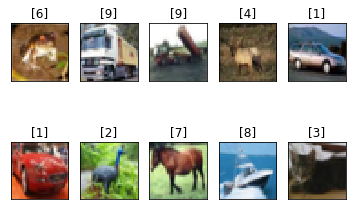

In [5]:
fig, axs = plt.subplots(2,5,sharex=False, sharey=False) # 绘制两行五列的子图 Drawing a subgraph with two rows and five columns
for i in range(2): # i 对应行数， 把数据想象成为矩阵，通过 i和j 定位图像，定位到图像后可视化即可 i corresponds to the number of rows, imagine the data as a matrix, locate the image by i and j, and visualise the image when it is located.
    for j in range(5):
        axs[i][j].imshow(sampel_10_data[i * 5 + j],cmap='gray') # 定义颜色 gray = rgb 
        axs[i][j].set(title=sampel_10_label[i * 5 + j]) # 设置title
        # axs[i][j].tick_params(axis='both',which='both')
        
        axs[i][j].set_xticks(()) # 设置x轴 Setting the x-axis
        axs[i][j].set_yticks(()) # 设置y轴 Setting the y-axis
# 绘制数据集里的x_train的data Plot the data for x_train in the dataset
# 首先是可视化数据集里的data，可视化数据集里的图片和标签究竟是什么, 先确定我们向神经网络中送入的数据是什么 
# Firstly the data in the visual dataset, visualising what the images and labels in the dataset actually are, and firstly determining what data we are feeding into the neural network.

(50000, 32, 32, 3) (5000, 32, 32, 3) (32, 32, 3)
(50000, 32, 32, 3) (5000, 32, 32, 3) (32, 32, 3)
(50000, 32, 32, 3) (5000, 32, 32, 3) (32, 32, 3)
(50000, 32, 32, 3) (5000, 32, 32, 3) (32, 32, 3)
(50000, 32, 32, 3) (5000, 32, 32, 3) (32, 32, 3)
(50000, 32, 32, 3) (5000, 32, 32, 3) (32, 32, 3)
(50000, 32, 32, 3) (5000, 32, 32, 3) (32, 32, 3)
(50000, 32, 32, 3) (5000, 32, 32, 3) (32, 32, 3)
(50000, 32, 32, 3) (5000, 32, 32, 3) (32, 32, 3)
(50000, 32, 32, 3) (5000, 32, 32, 3) (32, 32, 3)


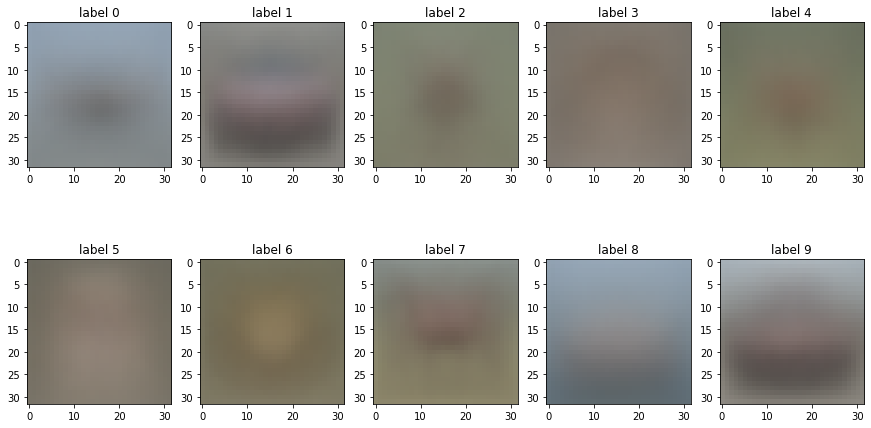

In [6]:
# show average images of every class 
# 规划处理数据，像素是分布在0-255之间的，现在让他分布到0-1之间，这是因为神经网络不能拟合过大的数，而且像素在（0-1）之间分布的话回归起来会更加稳定
# Planning to process the data, the pixels were distributed between 0-255, now let him distribute them between 0-1, this is because the neural network can not fit too large numbers, and the regression is more stable if the pixels are distributed between (0-1)
# 最后其实是通过loss优化模型，通俗上来说在（0-1）之间预测的数据波动比较小，它更容易优化更稳定，如果说数据过大则容易陷入极值
# In the end, it is actually through the loss optimisation model, in general terms between (0-1) predicted data fluctuation is relatively small, it is easier to optimise more stable, if the data is too large is prone to fall into the extreme values

def average_image(label):
    idxs = (y_train[:,0] == label)
    images = x_train[idxs]
    data = np.mean(images.astype(np.float32), axis=0)
    print(x_train.shape, images.shape, data.shape)
    return data / 255
# 将数据置于（0-1）之间，接下来进行可视化，在（0-1）之间虽然视觉上是无法分别的但是数据是不同的，神经网络会通过数据识别
# The data is placed between (0-1) and next visualised, between (0-1) although visually indistinguishable but the data is different, the neural network will identify by the data
plt.figure(figsize=(15, 8))
for i in range(2):
    for j in range(5):
        plt.subplot(2,5, i * 5 + j + 1)
        plt.imshow(average_image(i * 5 + j))
        plt.title(f"label {i * 5 + j}")


所以我们一般在处理数据的时候会做一个除以255的操作（一定要记住）So we generally do a divide by 255 operation when processing data (always remember)
从上图可以看出，同一类别图像的数据并不十分相似。图像之间的差异相对较小。From the above figures, it can be seen that the data for images of the same category are not very similar. The difference between images is relatively small

In [7]:
#### 将图像从三通道变为单通道 change images from three channels to one channel
print(x_train.shape)
train_x = np.mean(x_train,axis=3) / 255
test_x = np.mean(x_test,axis=3) / 255
train_y = np.eye(10)[y_train]
test_y = np.eye(10)[y_test]
print(train_x.shape)

(50000, 32, 32, 3)
(50000, 32, 32)


Grayscale image of the display image

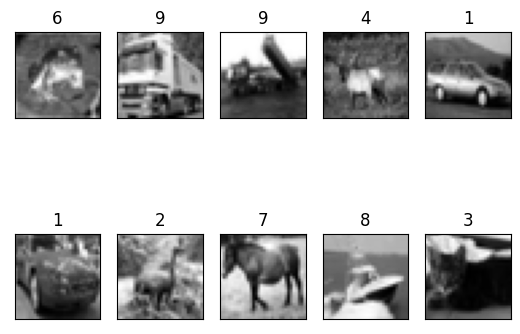

In [22]:
fig, axs = plt.subplots(2,5,sharex=False, sharey=False)
for i in range(2):
    for j in range(5):
        axs[i][j].imshow(train_x[i * 5 + j],cmap='gray')
        axs[i][j].set(title=np.argmax(train_y[i * 5 + j]))        
        axs[i][j].set_xticks(())
        axs[i][j].set_yticks(())
#取灰度通道进行可视化尝试，同样2行5列 Take the greyscale channel and try to visualise it, again 2 rows and 5 columns

(50000, 32, 32, 3) (5000, 32, 32, 3) (32, 32, 3)
(50000, 32, 32, 3) (5000, 32, 32, 3) (32, 32, 3)
(50000, 32, 32, 3) (5000, 32, 32, 3) (32, 32, 3)
(50000, 32, 32, 3) (5000, 32, 32, 3) (32, 32, 3)
(50000, 32, 32, 3) (5000, 32, 32, 3) (32, 32, 3)
(50000, 32, 32, 3) (5000, 32, 32, 3) (32, 32, 3)
(50000, 32, 32, 3) (5000, 32, 32, 3) (32, 32, 3)
(50000, 32, 32, 3) (5000, 32, 32, 3) (32, 32, 3)
(50000, 32, 32, 3) (5000, 32, 32, 3) (32, 32, 3)
(50000, 32, 32, 3) (5000, 32, 32, 3) (32, 32, 3)


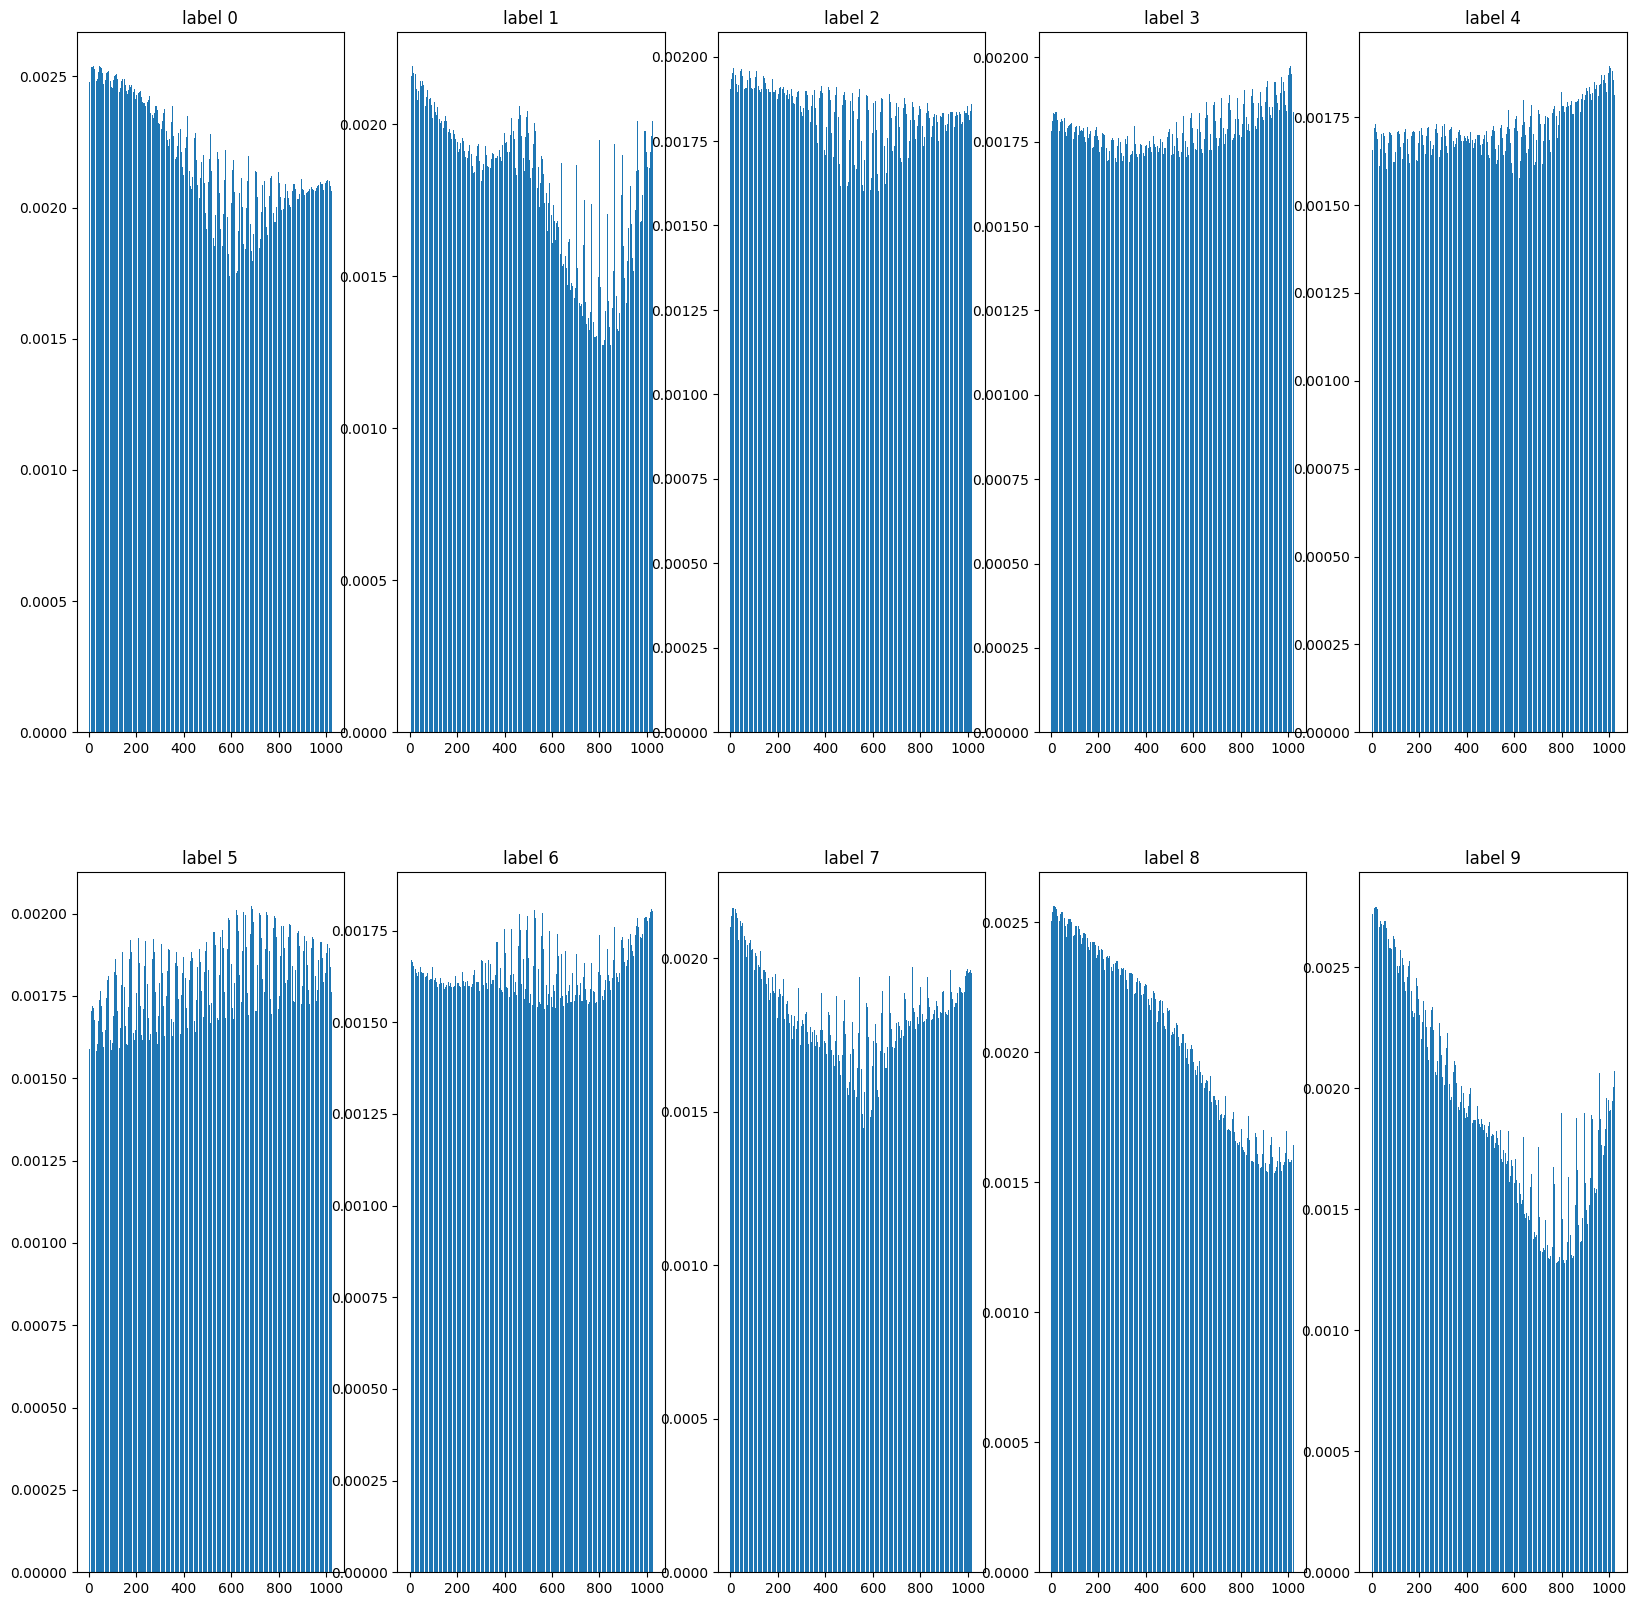

In [36]:
# 灰度地图上的数据分布 Data distribution on a grayscale map
avgs = [np.mean(average_image(i), axis = 2) / 255 for i in range(10)] #每十张图求一个平均值 Find an average for every ten graphs
# 显示每个类别平均数据分布的直方图 Histogram showing the average data distribution for each category
# fig,axs = plt.subplots(2, 5)
plt.figure(figsize=(20, 20))
for i in range(2):
    for j in range(5):
        plt.subplot(2,5, i * 5 + j + 1)
        plt.bar(list(range(32 * 32)), avgs[i * 5 + j].reshape([-1]))
        plt.title(f"label {i * 5 + j}")
# 通过图表显示图像上灰度值的分布和区域，分析每个label下图像灰度值的分布，可视化差异，接下来开始训练神经网络
# Show the distribution of grey values and regions on the image through a graph, analyse the distribution of grey values of the image under each label, visualise the differences and next start training the neural network
# 使用FCNN全连接神经网络 Fully Connected Neural Network 这个更简单更好学。Use FCNN Fully Connected Neural Network Fully Connected Neural Network This is simpler and better to learn.

从上图可以看出，某些类型的数据分布相对相似，因此使用单通道灰度图像进行数据分类的效果有限 It can be seen from the above figure that the distribution of certain types of data is relatively similar, so using a single channel grayscale image for data classification has limited effects

In [8]:
# 将图像转换为向量，用于训练 NN 模型 change images to vector for training NN model
# 把第一个维度上的图像保留，把后面的维度相乘，可以想象是把他们拉成一个向量，这是因为图像是一个二维的，32*32
# Keeping the image in the first dimension and multiplying the later dimensions can be imagined as pulling them into a vector, this is because the image is a two-dimensional, 32*32
# 比如[[1,1][1,1]]转换成[1,1,1,1,1,1]，可以较为简单的理解成形式上的转换，将二维的图像转换成一维的数据，更方便简单的神经网络进行机器学习。
# For example, [[1,1][1,1]] is converted to [1,1,1,1,1,1,1], which can be more simply understood as a formal conversion to convert a two-dimensional image to one-dimensional data, making it easier for simple neural networks to perform machine learning.
# 定义x和y Define x and y

train_x = train_x.reshape([-1,32 * 32])
test_x = test_x.reshape([-1,32 * 32])
train_y,test_y = train_y.reshape([-1, 10]),test_y.reshape([-1, 10])
train_y.shape,test_y.shape

((50000, 10), (10000, 10))

In [9]:
# X 和 y 的占位符 placeholders for X and y
# y=k1(kx+b)+b1可以简单的将这种简单的神经网络理解成这种形式，一种简单的二元一次方程更有利于我的学习
# y=k1(kx+b)+b1 can simply be understood as this simple neural network in this form, a simple quadratic equation more favourable to me
# 简单的例子 y=2x+1 x=data y=label Simple example y=2x+1 x=data y=label
# 由于我使用的神经网络过于简单，可能会导致结果不准确 Since the neural network I used is too simple, it may lead to inaccurate results

X = tf.placeholder(tf.float32,[None,32 * 32])
yy = tf.placeholder(tf.float32,[None,10])

In [12]:
# NN 模型的参数 parameters for NN model
# y=k1(kx+b)+b1 拟合方程，在这里我将w1和b1看作方程里的k和b，w2和b2=k1和b1，定义好再代入
# y=k1(kx+b)+b1 Fitting the equation, where I consider w1 and b1 as k and b in the equation, and w2 and b2 = k1 and b1, defined and then substituted into the

W1 = tf.Variable(tf.random_normal([32 * 32,512]))
b1 = tf.Variable(tf.zeros([1,512])+0.2)

W2 = tf.Variable(tf.random_normal([512, 10]))
b2 = tf.Variable(tf.zeros([1,10])+0.2)

# 可以说训练的过程就是在求k，b，k1，b1的参数，求出这些参数后可以想象成给一个x就能求出一个y，也就是说给一张图片他就能自动分类
# It can be said that the training process is to find the parameters of k, b, k1, b1, after finding these parameters can be imagined as given an x can find a y, that is to say, given a picture he can automatically classify the
# https://blog.csdn.net/ShiningLeeJ/article/details/126676581 这个网站有很多详细讲解

我定义了一个使用 512 个隐藏单元的隐藏层的神经网络，并使用 softmax 损失函数来训练我们的模型 We define a neural network using one hidden layer with 512 hidden uints and we use softmax loss function to train our model

In [11]:
prediction = tf.nn.softmax(tf.matmul(tf.nn.sigmoid(tf.matmul(X, W1) + b1), W2) + b2) # y=k1(kx+b)+b1
# 在这里我使用了一个sigmoid,最终输出的其实是概率，可以说是每一个类别的概率
# Here I have used a sigmoid, and the final output is actually the probability, so to speak, of each of the categories
# 比如说我在这里输出一个 2*1 的向量 [0.1, 0.5]，这里0.1就代表第一类的概率，0.5就代表第二类的概率，大概应该是哪个概率大图像就属于哪个类别
# Let's say I output a 2*1 vector [0.1, 0.5] here, where 0.1 would represent the probability of the first category, and 0.5 would represent the probability of the second category, and presumably whichever probability is greater the image would belong to

In [13]:
cross_entropy =tf.reduce_mean( -tf.reduce_sum(yy * tf.log(prediction),reduction_indices=[1])) # compute cross_entropy
# 定义了损失函数["hinge loss" (sometimes called "max-margin loss" or "large-margin)],通过 loss 优化模型。
# 可以理解成：通过上方的函数我们输入一个x可以得到一个y，我们得到的y和真实的y做差（交叉熵损失函数（Cross-Entropy Loss))
# L(y,p)= -ylog(p)-(1-y)log(1-p) log2pi
# 通俗说就是得出的y和真实的y做比较，他们之间的差别就是损失，就是loss。 不断训练模型的过程实际上就是在不断的优化loss，让他们之间的差异越来越小，这样预测的就更准确

In [14]:
train = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)
# 定义模型，使用GD优化器，最小化参数，使得差距越来越小，也就是loss
# Define the model, use the GD optimiser, minimise the parameters so that the gap gets smaller and smaller, i.e. the loss


In [15]:
# 初始化参数 Initialisation parameters
init = tf.global_variables_initializer()


Train Model

In [16]:
print(X.shape, yy.shape)
print(prediction.shape)
sess  = tf.Session() # 开启会话，因为接下来需要训练模型，因此在这里进行初始化 Open the session, as the model needs to be trained next, so initialise it here
sess.run(init)

# 循环是一个迭代的过程 A loop is an iterative process
for step in range(100):
    cnt = 0
    batch = 128
    while cnt * batch < train_x.shape[0]:
        # print(step, cnt)
        end = (cnt + 1) * batch
        if end > train_x.shape[0]:
            end = train_x.shape[0]
        batch_x = train_x[cnt * batch : end]
        batch_y = train_y[cnt * batch : end]
        cnt += 1
        sess.run(train, feed_dict={X:batch_x, yy:batch_y}) # 将定义的模型放入，再将x(data)和y(label)放入 Put the defined model in, then x(data) and y(label) in
    print(sess.run(cross_entropy,feed_dict={X:train_x,yy:train_y}))    

correct_prediction = tf.equal(tf.argmax(yy,1), tf.argmax(prediction,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
print("test set accuracy: ", sess.run(accuracy, feed_dict={X: test_x, yy: test_y}))

(?, 1024) (?, 10)
(?, 10)


2023-10-04 08:39:43.405934: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-04 08:39:43.438920: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


4.0087757
3.15457
2.8055375
2.6332529
2.5297
2.4562843
2.3999991
2.356265
2.321961
2.2943332
2.271733
2.2528822
2.2367206
2.2225428
2.2099118
2.1985254
2.188163
2.1786597
2.1698892
2.1617484
2.1541417
2.146971
2.1401334
2.1335273
2.1271174
2.120942
2.1150064
2.1093116
2.1038785
2.0987234
2.0938473
2.0892413
2.0848927
2.0807853
2.0768907
2.073179
2.0696104
2.066121
2.0626662
2.0592318
2.0558171
2.052432
2.0490935
2.0458071
2.04256
2.0393293
2.0360923
2.0328736
2.0297587
2.0267897
2.0239475
2.0212023
2.0185373
2.0159407
2.013407
2.01093
2.0085075
2.0061345
2.0038075
2.0015235
1.9992772
1.9970691
1.9948956
1.9927562
1.9906484
1.9885703
1.9865212
1.9844996
1.982504
1.9805337
1.9785875
1.9766644
1.9747641
1.972886
1.9710288
1.9691935
1.9673796
1.9655875
1.9638175
1.9620678
1.9603392
1.9586315
1.9569433
1.9552726
1.9536207
1.9519851
1.9503663
1.9487627
1.9471753
1.9456031
1.9440463
1.9425031
1.9409748
1.93946
1.9379592
1.936471
1.9349966
1.9335331
1.9320835
1.930645
test set accuracy:  0.289

产出测试准确率 Output test accuracy

prediction
From the calculation results of the above model, the classifier obtained by using a hidden layer model combined with data fusion into a single channel has limited effectiveness, which is relatively consistent with our data analysis

Attention: Convolutional neural network part of this work focuses on the reference of TensorFlow tutorials. For more references please read the read me section on github.

Code reference: 1.TensorFlow (2022) Convolutional Neural Network, CNN. Available at: https://www.tensorflow.org/tutorials/images/cnn?hl=zh-cn (Accessed: 3 October 2023). 
2.Shining, L (2022) ‘Convolutional Neural Networks Explained’ , CSDN blog, 13 September. Available at: https://blog.csdn.net/ShiningLeeJ/article/details/126827739 (Accessed: 4 October 2023).


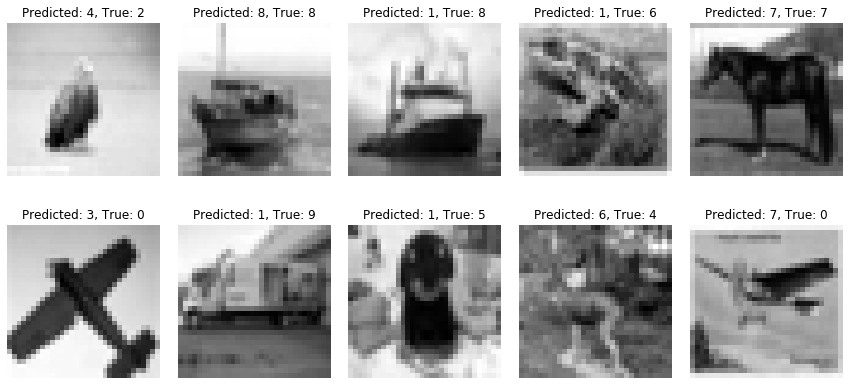

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 test_x 是测试图像数据，test_y 是测试标签数据，sess 是你的 TensorFlow 会话
# Assuming test_x is the test image data, test_y is the test label data, and sess is your TensorFlow session
# 这里我们随机选择十张图像进行预测和绘制
# Here we randomly select ten images for prediction and plotting #
num_images_to_visualize = 10
random_indices = np.random.choice(len(test_x), num_images_to_visualize, replace=False)

fig, axs = plt.subplots(2, 5, figsize=(12, 6))

# 遍历选中的图像 Iterate over selected images
for idx, ax in enumerate(axs.ravel()):
    test_image = test_x[random_indices[idx]].reshape(1, -1)  # 假设图像已经被拉平成一维向量 Suppose the image has been flattened into a one-dimensional vector

    # 进行预测 carry out forecasting
    predicted_probabilities = sess.run(prediction, feed_dict={X: test_image.reshape(1,32*32)})

    # 获取预测结果中概率最高的类别 Get the category with the highest probability in the predicted outcome
    predicted_class = np.argmax(predicted_probabilities)
    
    # 获取真实标签 Get real labels
    true_class = np.argmax(test_y[random_indices[idx]])

    # 将一维向量恢复成图像的形状，假设图像大小为 32x32 像素 Recover the one-dimensional vector into the shape of the image, assuming the image size is 32x32 pixels
    test_image = test_image.reshape(32, 32)

    # 绘制图像和预测结果 Plotting images and predicting results
    ax.imshow(test_image, cmap='gray')
    ax.set_title(f"Predicted: {predicted_class}, True: {true_class}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
Much of the code below is based on the Tensorflow tutorial "Convolutional Neural Network (CNN)".
Link:https://www.tensorflow.org/tutorials/images/cnn?hl=zh-cn

In [30]:
# Download and prepare the CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

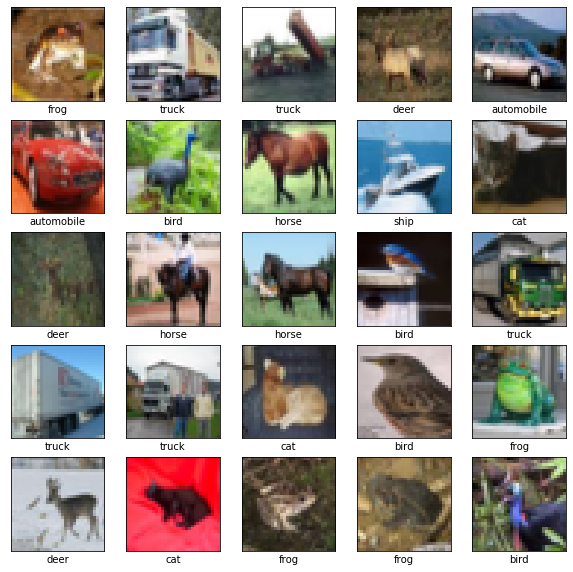

In [32]:
# Validation data
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
Constructing a Convolutional Neural Network Model
The 6 lines of code shown below declare a common convolutional neural network, consisting of several Conv2D and MaxPooling2D layers.

In [31]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [ ]:
In the structure above, you can see that the output of each Conv2D and MaxPooling2D layer is a three-dimensional tensor whose shape describes (height, width, channels). The deeper the layer, 
the more the width and height shrink. The number of channels output by each Conv2D layer depends on the first parameter when declaring the layer (e.g. 32 or 64 in the code above). 
Thus, you can (from an arithmetic point of view) increase the number of channels per Conv2D layer due to the shrinking width and height.

In [33]:
# Compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
49984/50000 [============================>.] - ETA: 0s - loss: 1.4872 - acc: 0.4611

/Users/dada/anaconda3/envs/yolo/lib/python3.7/site-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


50000/50000 [==============================] - 92s 2ms/sample - loss: 1.4873 - acc: 0.4611 - val_loss: 1.2392 - val_acc: 0.5657
Epoch 2/10
50000/50000 [==============================] - 94s 2ms/sample - loss: 1.1230 - acc: 0.6061 - val_loss: 1.0176 - val_acc: 0.6461
Epoch 3/10
50000/50000 [==============================] - 95s 2ms/sample - loss: 0.9784 - acc: 0.6583 - val_loss: 0.9455 - val_acc: 0.6697
Epoch 4/10
50000/50000 [==============================] - 94s 2ms/sample - loss: 0.8749 - acc: 0.6930 - val_loss: 0.9450 - val_acc: 0.6749
Epoch 5/10
50000/50000 [==============================] - 101s 2ms/sample - loss: 0.8017 - acc: 0.7190 - val_loss: 0.8525 - val_acc: 0.7028
Epoch 6/10
50000/50000 [==============================] - 92s 2ms/sample - loss: 0.7385 - acc: 0.7418 - val_loss: 0.8784 - val_acc: 0.7052
Epoch 7/10
50000/50000 [==============================] - 98s 2ms/sample - loss: 0.6912 - acc: 0.7572 - val_loss: 0.8386 - val_acc: 0.7153
Epoch 8/10
50000/50000 [=============

Evaluation model

In [35]:

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

0.7072


predict

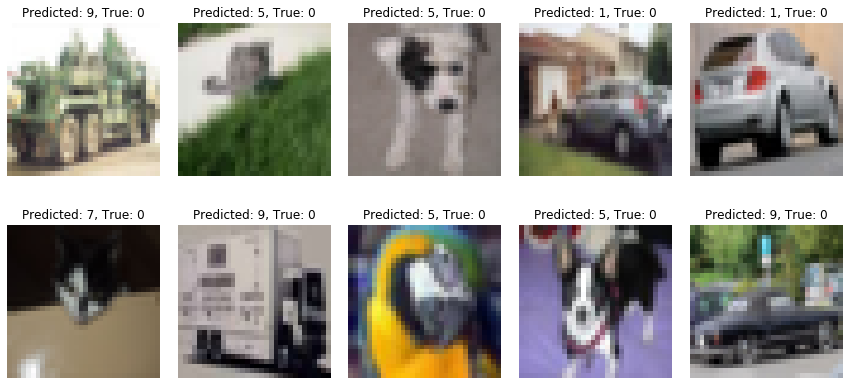

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 test_x 是测试图像数据，test_y 是测试标签数据，sess 是你的 TensorFlow 会话  Assuming test_x is the test image data, test_y is the test label data, and sess is your TensorFlow session
# 这里我们随机选择十张图像进行预测和绘制 Here I randomly select ten images for prediction and plotting
num_images_to_visualize = 10
random_indices = np.random.choice(len(test_images), num_images_to_visualize, replace=False)

fig, axs = plt.subplots(2, 5, figsize=(12, 6))

# 遍历选中的图像 Iterate over the selected images
for idx, ax in enumerate(axs.ravel()):
    test_image1 = test_images[random_indices[idx]] # 设图像已经被拉平成一维向量 Let the image has been flattened into a one-dimensional vector

    # 进行预测 carry out forecasting
    predicted_probabilities =model.predict(test_image1.reshape(1,32,32,3))

    # 获取预测结果中概率最高的类别 Get the category with the highest probability in the predicted outcome
    predicted_class = np.argmax(predicted_probabilities)
    
    # 获取真实标签 Get real labels
    true_class = np.argmax(test_labels[random_indices[idx]])

    # 将一维向量恢复成图像的形状，假设图像大小为 32x32 像素 Recover the one-dimensional vector into the shape of the image, assuming the image size is 32x32 pixels
    test_image1 = test_image1.reshape(32, 32,3)

    # 绘制图像和预测结果 Plotting images and predicting results
    ax.imshow(test_image1, cmap='gray')
    ax.set_title(f"Predicted: {predicted_class}, True: {true_class}")
    ax.axis('off')

plt.tight_layout()
plt.show()

俩种方法下，其CNN的验证的准确率远远高于我们的FNN，根据随机的选取测试集的预测结果可视化可知，其CNN预测的准确率更高
The accuracy of the verification of its CNN is much higher than that of our FNN under the two methods, as can be seen from the visualisation of the prediction results of the randomly selected test set.